# **MIE1513: Final Project**
### Submission date: April 20, 2020 at 23:59pm

-------------

## Academic Integrity Declaration:
In submitting this assessment, I confirm that my conduct during this project adheres to the Code of Behaviour on Academic Matters. I confirm that I have not acted in such a way that would constitute cheating, misrepresentation, or unfairness, including but not limited to, using unauthorized aids and assistance, impersonating another person, and committing plagiarism. I pledge upon my honour that I have not violated the Faculty of Applied Science & Engineering’s Honour Code during this assessment.

-------------


## Part 1: Data Loading

### (a) Load the provided dataset (reddit_data.json)

In [317]:
import pandas as pd
import numpy as np
import html
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy
from nltk import tokenize
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
data_all = pd.read_json("reddit_data.zip", orient='records', lines=True)
data_all = data_all[["id", "author", "created_utc", "subreddit", "title", "num_comments", "score", "selftext", "url"]]

In [3]:
data_all.head()

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,abcupx,WithGravy,1546300839,gaming,What are some game games to enjoy on a low-end...,31,3,Got a new laptop and want to enjoy some games ...,https://www.reddit.com/r/gaming/comments/abcup...
1,abcuz2,mikebeingfrank,1546300881,pics,"In 1964, an average wage worker had to clock 8...",4,5,,https://i.redd.it/j6rqqthwcp721.jpg
2,abcv1a,[deleted],1546300892,worldnews,"India: Chinese woman, 25, on solo trip to Khaj...",13,23,,https://timesofindia.indiatimes.com/city/agra/...
3,abcv5v,Lucious-Lyon,1546300914,AskReddit,[Serious] American Liberals of Reddit: Without...,76,0,[removed],https://www.reddit.com/r/AskReddit/comments/ab...
4,abcv7f,sandollars,1546300923,worldnews,"According to the Fiji Government, the Australi...",21,13,,http://fijisun.com.fj/2019/01/01/vuniwaqa-prak...


### (b)	Generate your unique subset of the data

**Make sure you update unique_string with your email address**

In [0]:
# DO NOT CHANGE THE FUNCTION BELOW
def getMySubreddits(data, my_str):
    assert my_str != "", "You must fill in your unique string"
    import random
    subreddits = sorted(data["subreddit"].unique().tolist())
    rng = random.Random(my_str)
    return rng.sample(subreddits, 4)

In [5]:
# Fill in your UofT email in the variable unique_string below
unique_string = "da.da@mail.utoronto.ca" 
my_subreddits = getMySubreddits(data_all, unique_string)
print("My subreddits:", my_subreddits)

My subreddits: ['soccer', 'Android', 'funny', 'WTF']


In [0]:
data = data_all[data_all["subreddit"].isin(my_subreddits)]

In [7]:
data

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
26,abcwzf,[deleted],1546301245,soccer,Is the winter transfer window officially open?,0,1,[removed],https://www.reddit.com/r/soccer/comments/abcwz...
31,abcx8c,[deleted],1546301291,funny,When Krispy Kream is life.,8,0,[deleted],https://i.redd.it/we2ivogeyo721.jpg
32,abcx7w,[deleted],1546301310,funny,They started playing the wii sports theme at t...,10,7,[deleted],https://v.redd.it/3nafm4c0ep721
47,abcyee,itsahardg,1546301494,funny,"No car, no problem",7,0,,https://v.redd.it/cmdi8cx9ep721
58,abczl6,MrBer0,1546301673,funny,Breaking News,10,0,,https://i.redd.it/eqswc38qdp721.jpg
...,...,...,...,...,...,...,...,...,...
226220,alvsvh,AMP2527,1548978979,funny,Just an absolutely ridiculous video that I fou...,23,14,,https://v.redd.it/1yyolu1eiud21
226229,alvti3,vearz,1548979114,soccer,No Sabaly for Fulham this transfer window - ac...,17,27,,https://twitter.com/JakubKrupa/status/10911216...
226230,alvtk5,1Warrior4All,1548979126,soccer,Porto announces the signing of Loum on loan fr...,7,24,,https://twitter.com/FCPorto/status/10911042932...
226231,alvtlf,MrSqueegee95,1548979132,soccer,DAN JAMES. Deal was chopped and changed too of...,63,29,,https://twitter.com/reluctantnicko/status/1091...


## Part 2: Exploratory Data Analysis 

### 2.1 Identify the Importance of Columns
'Title' and 'selftext' are important for sure because they provide us data to do the natural language process. 'Subreddit' is also important for sure because it's the label of texts. 'Created_utc' can tell us when it is posted if we convert the timestamp to date time. For the rest of columns, we can use df.values_counts() or plot the histogram/boxplot to see the features of distribution of each columns except for 'url' where further processing is required.

### 2.1.1 The 'id' column
The 'id' column is not useful at all, because every id only appears once. We cannot gain any information from this column.

In [0]:
id_value_counts = data.id.value_counts()

Text(0, 0.5, 'frequency')

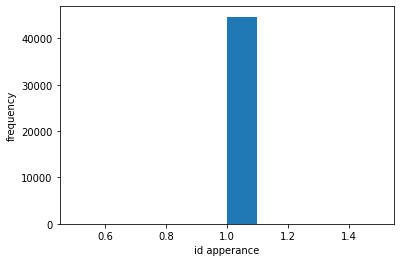

In [9]:
# Visualize the value_counts
plt.hist(id_value_counts)
plt.xlabel('id apperance')
plt.ylabel('frequency')

### 2.1.2 The 'author' column
The author column is useful because we can identify the very productive authors. Most of the authors only have one posts but there are a few of them have more than 100 posts. We also want to investigate these productive author and see if they have a specific preference on topic. 

In [10]:
data.author.value_counts()

[deleted]         9945
Meladroit40        911
Gungerz            301
MatchThreadder     251
Warcrocco          245
                  ... 
Good_guy_keanu       1
dfdaddy81            1
anotherbozo          1
jasdevbabra          1
baron7755            1
Name: author, Length: 20400, dtype: int64

In [0]:
# Exclude [deleted] and see what information we can get
author_value_counts = data.loc[data.author!='[deleted]'].author.value_counts()

Text(0, 0.5, 'author apperance')

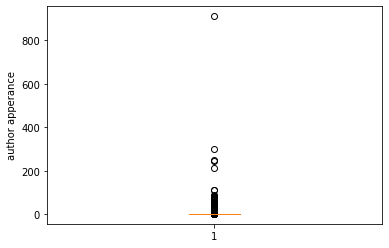

In [12]:
# Visualize the author_value_counts
plt.boxplot(author_value_counts)
plt.ylabel('author apperance')

#### Investigate the productive author (>100 posts)
We can see all the productive authors only interested in soccer

In [13]:
data.author.value_counts()[1:8]

Meladroit40            911
Gungerz                301
MatchThreadder         251
Warcrocco              245
no_idea-to_nick        214
DriesMertens           113
Alessio_Romagnoli13    113
Name: author, dtype: int64

In [0]:
authors = ['Meladroit40','Gungerz','MatchThreadder','Warcrocco','no_idea-to_nick','Alessio_Romagnoli13','DriesMertens']

In [15]:
for author in authors:
  print('The author ',author, ' has posts in topic:')
  print(data.loc[data.author==author].subreddit.value_counts())
  print('----------------------')

The author  Meladroit40  has posts in topic:
soccer    911
Name: subreddit, dtype: int64
----------------------
The author  Gungerz  has posts in topic:
soccer    301
Name: subreddit, dtype: int64
----------------------
The author  MatchThreadder  has posts in topic:
soccer    251
Name: subreddit, dtype: int64
----------------------
The author  Warcrocco  has posts in topic:
soccer    245
Name: subreddit, dtype: int64
----------------------
The author  no_idea-to_nick  has posts in topic:
soccer    214
Name: subreddit, dtype: int64
----------------------
The author  Alessio_Romagnoli13  has posts in topic:
soccer    113
Name: subreddit, dtype: int64
----------------------
The author  DriesMertens  has posts in topic:
soccer    113
Name: subreddit, dtype: int64
----------------------


### 2.1.3 The 'create_utc' column
There are more posts at the end of the month, and the number of posts on each date is oscilatting

In [0]:
utc = data.created_utc.values

In [0]:
# Convert utc to date
date = []
for i in range (len(utc)):
  date.append(datetime.fromtimestamp(utc[i]).date().strftime("%m/%d/%Y"))

In [18]:
data.rename(columns={'created_utc':'date'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
data['date'] = date

In [20]:
data.date.unique()

array(['01/01/2019', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/05/2019', '01/06/2019', '01/07/2019', '01/08/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/12/2019',
       '01/13/2019', '01/14/2019', '01/15/2019', '01/16/2019',
       '01/17/2019', '01/18/2019', '01/19/2019', '01/20/2019',
       '01/21/2019', '01/22/2019', '01/23/2019', '01/24/2019',
       '01/25/2019', '01/26/2019', '01/27/2019', '01/28/2019',
       '01/29/2019', '01/30/2019', '01/31/2019'], dtype=object)

In [0]:
# All the dates are in 2019 Janurary, so we can encode it by days
encoded = []
for i in range (len(date)):
  if date[i][3] == '0':
    encoded.append(int(date[i][4]))
  else:
    encoded.append(int(date[i][3:5]))

In [22]:
data['date'] = encoded

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'frequency')

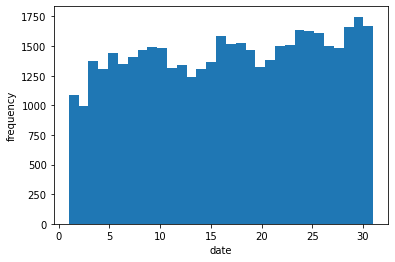

In [23]:
# Visualize the distributino of date
plt.hist(encoded,bins=31)
plt.xlabel('date')
plt.ylabel('frequency')

### 2.1.4 The 'num_comments' and 'score' column
These two columns have integer values so we investigate them together. From their boxplot, we can see most posts have zero number of comments and score. Only a few of them have high values. The distribution of these two columns are similar, so we suspect there's correlation between them. Both cosine similariy and Pearson coefficient indicate there's a moderate correlation between them. However, it's not strong enough to remove one. 

In [0]:
num_comments = data.num_comments.values
score = data.score.values

Text(0, 0.5, 'num_comments')

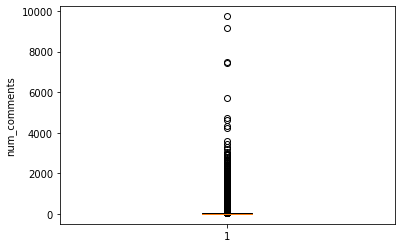

In [25]:
plt.boxplot(num_comments)
plt.ylabel('num_comments')

Text(0, 0.5, 'score')

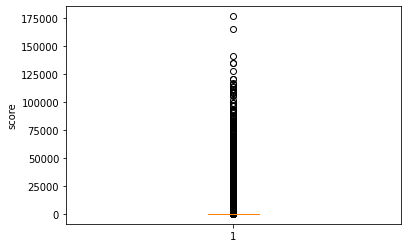

In [26]:
plt.boxplot(score)
plt.ylabel('score')

In [27]:
# See if they have correlation using cosine similarity
1 - scipy.spatial.distance.cosine(num_comments,score) 

0.6930277132293028

In [28]:
# See if they have correlation using Pearson coefficient
scipy.stats.pearsonr(num_comments,score)[0]

0.6815121138869001

### 2.1.5 The 'subreddit' column
Use histogram to see the distribution of the 4 subreddits. Funny and soccer are significantly more than WTF and Android

Text(0, 0.5, 'frequency')

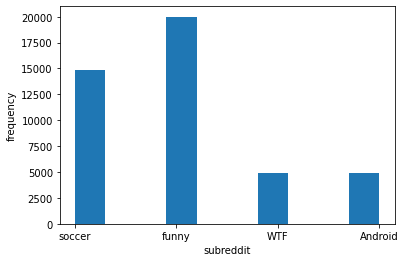

In [29]:
subreddit = data.subreddit.values
plt.hist(subreddit)
plt.xlabel('subreddit')
plt.ylabel('frequency')

### 2.1.6 The 'url' column
The 'url' column does provide us some information. If we look at the content of the url, we can catagorize them into image, video and article. From the histogram, we can see each form has a considerable number of data. 

In [0]:
form = []
for url in data.url.values:
  if 'i.redd.it' in url:
    form.append('image')
  elif 'imgur' in url:
    form.append('image')
  elif 'instagram.com' in url:
    form.append('image')
  elif 'v.redd.it' in url:
    form.append('video')
  elif 'youtube' in url:
    form.append('video')
  elif 'youtu.be' in url:
    form.append('video')
  elif 'streamable' in url:
    form.append('video')
  elif 'streamja' in url:
    form.append('video')
  else:
    form.append('article')


In [0]:
data['form'] = form

Text(0, 0.5, 'frequency')

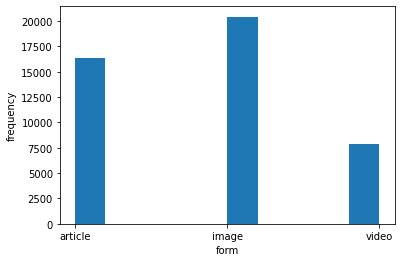

In [32]:
plt.hist(form)
plt.xlabel('form')
plt.ylabel('frequency')

### 2.1.7 The 'title' column
For this column, we investigate the length of the titles. Most of the posts have title length less than 30 words and the length can vary from 0 to 60. This can be used as a feature when doing classification. 

In [0]:
titles = data.title.values.copy()

In [0]:
tokenizer = tokenize.RegexpTokenizer('\s+', gaps=True)

In [0]:
for i in range (len(titles)):
  titles[i] = tokenizer.tokenize(titles[i])
  titles[i] = [word.lower() for word in titles[i]]

In [0]:
length = []
for title in titles:
  length.append(len(title))

In [0]:
data['length'] = length

Text(0, 0.5, 'frequency')

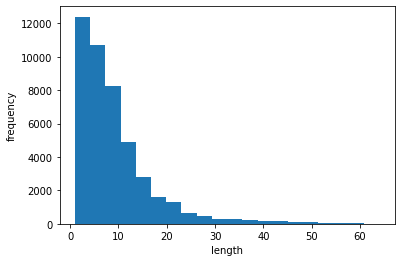

In [38]:
# Visualize the distribution of length
plt.hist(length,bins=20)
plt.xlabel('length')
plt.ylabel('frequency')

### 2.2 Remove Symbols
The dollar sign and star sign need to be removed. Since the topics include Andriod and soccer, the dollar sign will be mostly related to price of devices or transfer fee. The dollar signs are likely to be followed by a number. In soccer transfer market, the tranfer fees are usually calculated in Euros or Pounds, so we want to remove all the $, € and £ to make it uniform. The star sign are often used in dirty words like "f**k". We want to remove it to normalize these dirty words. 

### 2.3 Outliers and Imbalance
In terms of label, the data is not quite imbalanced. Although soccer and funny are more than WTF and Android, all 4 labels have considerable amount of data. The number of comment and score features are very imbalance with many outliers. Most of their values are zeros and have a few very large values. The form and date features are balanced. The length feature has a skewed distribution. All the visualizations can be found above. 

## Part 3: Classification

### 3.1 Encoding

In [0]:
data = data.reset_index()

In [40]:
# Grab the useful columns
df = data[['author','date','subreddit','num_comments','score','form','length']].copy()
df

,author,date,subreddit,num_comments,score,form,length
0,[deleted],1,soccer,0,1,article,7
1,[deleted],1,funny,8,0,image,5
2,[deleted],1,funny,10,7,video,11
3,itsahardg,1,funny,7,0,video,4
4,MrBer0,1,funny,10,0,image,2
...,...,...,...,...,...,...,...
44690,AMP2527,31,funny,23,14,video,18
44691,vearz,31,soccer,17,27,article,30
44692,1Warrior4All,31,soccer,7,24,article,11
44693,MrSqueegee95,31,soccer,63,29,article,32


In [0]:
count_author = Counter()
authors = df.author.values
for i in range (len(authors)):
  count_author.update([authors[i]])

In [0]:
# Encode author by their appearance and assign 0 to [deleted]
author_dict = dict(count_author.most_common(len(df.author.unique())))
author_dict['[deleted]'] = 0

In [0]:
author_encode = []
for i in range (len(authors)):
  author_encode.append(author_dict[authors[i]])

In [0]:
df['author'] = author_encode

In [0]:
forms = df.form.values.copy()

In [0]:
# Encode forms by One-hot since they 
enc = OneHotEncoder(handle_unknown='ignore')
forms = enc.fit_transform(forms.reshape(-1,1)).toarray()

In [0]:
article = forms[:,0]
image = forms[:,1]
video = forms[:,2]

In [0]:
df['article'] = article
df['image'] = image
df['video'] = video

In [0]:
# One-hot and ordinal encode the labels
subreddits = df.subreddit.values.copy()
enc = OneHotEncoder(handle_unknown='ignore')
onehot_lables = enc.fit_transform(subreddits.reshape(-1,1)).toarray()
ode = OrdinalEncoder()
ordinal_lables = ode.fit_transform(subreddits.reshape(-1,1))

In [50]:
df.head()

,author,date,subreddit,num_comments,score,form,length,article,image,video
0,0,1,soccer,0,1,article,7,1.0,0.0,0.0
1,0,1,funny,8,0,image,5,0.0,1.0,0.0
2,0,1,funny,10,7,video,11,0.0,0.0,1.0
3,1,1,funny,7,0,video,4,0.0,0.0,1.0
4,1,1,funny,10,0,image,2,0.0,1.0,0.0


### 3.2 Choose Metric
The possible metrics for multi-class classification are precision ,recall, accuracy and F1. In this case we are not going to use precision and recall, since neither of false positive and false negative have a larger cost than the other. We choose accuracy rather than F1 because the data is not actually uneven. Although soccer and funny are more than WTF and Android, they all have considerable amount of data. 

### 3.3 Split the Data and Justify the Evaluation Method
We are going to split the data into train and test group by 70% and 30% respectively. For the training set, we will do a 5-fold cross validation to tune the hyperparameter and reduce the variance of performance. We choose K = 5 for less computational cost. We will try 3 feature sets:
1. Include all columns
2. Choose author, score and length
3. Choose date, num_comment and form

In [0]:
first_set = df[['author', 'date', 'num_comments', 'score', 'length', 'article', 'image', 'video']]
second_set = df[['author','score','length']]
third_set = df[['date', 'num_comments', 'article','image','video']]

### 3.4 Logistic Regression

First Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(first_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
Lgs = LogisticRegression(max_iter=10000)

In [54]:
# Hyperparameter tuning by grid search on cross validation
C = [0.001,0.01,0.05,0.1,0.5,1,5,10]
param_grid = dict(C=C)
grid = GridSearchCV(estimator=Lgs, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train,y_train)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score:  0.7303905633999286
Best Parameters:  {'C': 10}


The Best parameters found by grid search on cross validation is C = 10, with accuracy of 0.73. Since the hyperparameter tuning takes super long time, we are going to assume this is also the best parameters for second and third sets. 

In [55]:
Lgs = LogisticRegression(max_iter=10000,C=10).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
first_lgs_train = Lgs.score(X_train, y_train)
first_lgs_test = Lgs.score(X_test, y_test)

In [57]:
first_lgs_train

0.7293677683308828

In [58]:
first_lgs_test

0.723245581325975

Second Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(second_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
Lgs = LogisticRegression(max_iter=10000,C=10).fit(X_train, y_train)

In [0]:
second_lgs_train = Lgs.score(X_train, y_train)
second_lgs_test = Lgs.score(X_test, y_test)

In [62]:
second_lgs_train

0.6181039442562168

In [63]:
second_lgs_test

0.6102617644865389

Third Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(third_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
Lgs = LogisticRegression(max_iter=10000,C=10).fit(X_train, y_train)

In [0]:
third_lgs_train = Lgs.score(X_train, y_train)
third_lgs_test = Lgs.score(X_test, y_test)

In [67]:
third_lgs_train

0.6879115259221377

In [68]:
third_lgs_test

0.6840927735103289

### 3.5 Naive Bayes


First Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(first_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
NB = MultinomialNB()

In [71]:
alpha = [0.1,1,10,20,30,50]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=NB, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train,y_train)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.27875105991867566
Best Parameters:  {'alpha': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
NB = MultinomialNB(alpha=0.1).fit(X_train, y_train)

In [0]:
first_NB_train = NB.score(X_train, y_train)
first_NB_test = NB.score(X_test, y_test)

In [74]:
first_NB_train

0.2785271367384773

In [75]:
first_NB_test

0.28257140726377805

Second Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(second_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
NB = MultinomialNB()

In [78]:
alpha = [0.1,1,10,20,30,50]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=NB, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train,y_train)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.3125041264106987
Best Parameters:  {'alpha': 10}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
NB = MultinomialNB(alpha=10).fit(X_train, y_train)

In [0]:
second_NB_train = NB.score(X_train, y_train)
second_NB_test = NB.score(X_test, y_test)

In [81]:
second_NB_train

0.3120245477210254

In [82]:
second_NB_test

0.31531061227533747

Third Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(third_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
NB = MultinomialNB()

In [85]:
alpha = [0.1,1,10,20,30,50]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=NB, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train,y_train)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

Best Score:  0.36105634172947776
Best Parameters:  {'alpha': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
NB = MultinomialNB(alpha=0.1).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
third_NB_train = NB.score(X_train, y_train)
third_NB_test = NB.score(X_test, y_test)

In [88]:
third_NB_train

0.3641564917215368

In [89]:
third_NB_test

0.36922962189574166

### 3.6 Random Forest

First Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(first_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
Forest = RandomForestClassifier()

In [92]:
n_estimators = [10,50,100,200]
max_depth = [50,100,200,500,1000]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=Forest, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train,y_train)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score:  0.824522165088811
Best Parameters:  {'max_depth': 200, 'n_estimators': 200}


In [0]:
Forest = RandomForestClassifier(max_depth=200,n_estimators=200).fit(X_train,y_train)

In [0]:
first_RF_train = Forest.score(X_train, y_train)
first_RF_test = Forest.score(X_test, y_test)

In [95]:
first_RF_train

0.9796394553474398

In [96]:
first_RF_test

0.8194496233872772

Second Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(second_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
Forest = RandomForestClassifier()

In [99]:
n_estimators = [10,50,100,200]
max_depth = [50,100,200,500,1000]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=Forest, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train,y_train)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score:  0.6858661028954058
Best Parameters:  {'max_depth': 100, 'n_estimators': 200}


In [0]:
Forest = RandomForestClassifier(max_depth=200,n_estimators=200).fit(X_train,y_train)

In [0]:
second_RF_train = Forest.score(X_train, y_train)
second_RF_test = Forest.score(X_test, y_test)

In [102]:
second_RF_train

0.8125359585757208

In [103]:
second_RF_test

0.6747706764113655

Third Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(third_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
Forest = RandomForestClassifier()

In [106]:
n_estimators = [10,50,100,200]
max_depth = [50,100,200,500,1000]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=Forest, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=5)
result = grid.fit(X_train,y_train)

print('Best Score: ', result.best_score_)
print('Best Parameters: ', result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score:  0.7496643580219237
Best Parameters:  {'max_depth': 500, 'n_estimators': 200}


In [0]:
Forest = RandomForestClassifier(max_depth=100,n_estimators=200).fit(X_train,y_train)

In [0]:
third_RF_train = Forest.score(X_train, y_train)
third_RF_test = Forest.score(X_test, y_test)

In [109]:
third_RF_train

0.8206865690724285

In [110]:
third_RF_test

0.7473338802296965

### 3.7 Multi-Layer Perceptron
This algorithm takes way more times to train than others. So we won't do cross validation or fine grid research for this one. We are just going to try some architectures. 

First Set

Try 10k neurons, one layer

In [0]:
X_train, X_test, y_train, y_test = train_test_split(first_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(10000,),verbose=100).fit(X_train, y_train)

In [0]:
mlp_10k_train = mlp.score(X_train,y_train)
mlp_10k_test = mlp.score(X_test,y_test)

In [114]:
print('10k neurons one layer has training accuracy: ',mlp_10k_train)
print('10k neurons one layer has testing accuracy: ',mlp_10k_test)

10k neurons one layer has training accuracy:  0.7836412452854312
10k neurons one layer has testing accuracy:  0.7750018644194198


Try 5k neurons, 3 layers

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(5000,3),verbose=100).fit(X_train, y_train)

In [0]:
mlp_5k_train = mlp.score(X_train,y_train)
mlp_5k_test = mlp.score(X_test,y_test)

In [117]:
print('5k neurons 3 layers has training accuracy: ',mlp_5k_train)
print('5k neurons 3 layers has testing accuracy: ',mlp_5k_test)

5k neurons 3 layers has training accuracy:  0.4485712459246948
5k neurons 3 layers has testing accuracy:  0.44492505033932434


Try 30k neurons, one layer

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(30000,),verbose=100).fit(X_train, y_train)

In [0]:
mlp_30k_train = mlp.score(X_train,y_train)
mlp_30k_test = mlp.score(X_test,y_test)

In [120]:
print('30k neurons one layer has training accuracy: ',mlp_30k_train)
print('30k neurons one layer has testing accuracy: ',mlp_30k_test)

30k neurons one layer has training accuracy:  0.8254490826567794
30k neurons one layer has testing accuracy:  0.8162428219852338


Try 5k neurons, one layer

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(5000,),verbose=100).fit(X_train, y_train)

In [0]:
mlp_5kone_train = mlp.score(X_train,y_train)
mlp_5kone_test = mlp.score(X_test,y_test)

In [123]:
print('5k neurons one layer has training accuracy: ',mlp_5kone_train)
print('5k neurons one layer has testing accuracy: ',mlp_5kone_test)

5k neurons one layer has training accuracy:  0.8315860129131241
5k neurons one layer has testing accuracy:  0.8193004698336938


Try 3k neurons, one layer

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(3000,),verbose=100).fit(X_train, y_train)

In [0]:
mlp_3k_train = mlp.score(X_train,y_train)
mlp_3k_test = mlp.score(X_test,y_test)

In [126]:
print('3k neurons one layer has training accuracy: ',mlp_3k_train)
print('3k neurons one layer has testing accuracy: ',mlp_3k_test)

3k neurons one layer has training accuracy:  0.8327686505146071
3k neurons one layer has testing accuracy:  0.8199716608248192


Try 1k neurons, 5 layers

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,5),verbose=100).fit(X_train, y_train)

In [0]:
mlp_1k_train = mlp.score(X_train,y_train)
mlp_1k_test = mlp.score(X_test,y_test)

In [129]:
print('1k neurons 5 layers has training accuracy: ',mlp_1k_train)
print('1k neurons 5 layers has testing accuracy: ',mlp_1k_test)

1k neurons 5 layers has training accuracy:  0.8227002493127916
1k neurons 5 layers has testing accuracy:  0.8154970542173168


##### Second Set
We use the architecture of 3k neurons and one layer for the rest of training, since it has the highest test accuracy for the first set. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(second_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(3000,),verbose=100).fit(X_train, y_train)

In [0]:
mlp_second_train = mlp.score(X_train,y_train)
mlp_second_test = mlp.score(X_test,y_test)

In [142]:
print('3k neurons one layer on second set has training accuracy: ',mlp_second_train)
print('3k neurons one layer on second set has testing accuracy: ',mlp_second_test)

3k neurons one layer on second set has training accuracy:  0.7142172217605318
3k neurons one layer on second set has testing accuracy:  0.7007233947348795


Third Set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(second_set, ordinal_lables, test_size = 0.3, random_state = 42)

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(3000,),verbose=100).fit(X_train, y_train)

In [0]:
mlp_third_train = mlp.score(X_train,y_train)
mlp_third_test = mlp.score(X_test,y_test)

In [146]:
print('3k neurons one layer on third set has training accuracy: ',mlp_third_train)
print('3k neurons one layer on third set has testing accuracy: ',mlp_third_test)

3k neurons one layer on third set has training accuracy:  0.7170939078181935
3k neurons one layer on third set has testing accuracy:  0.7037064658065478


### 3.8 Conclusion

Plot the results

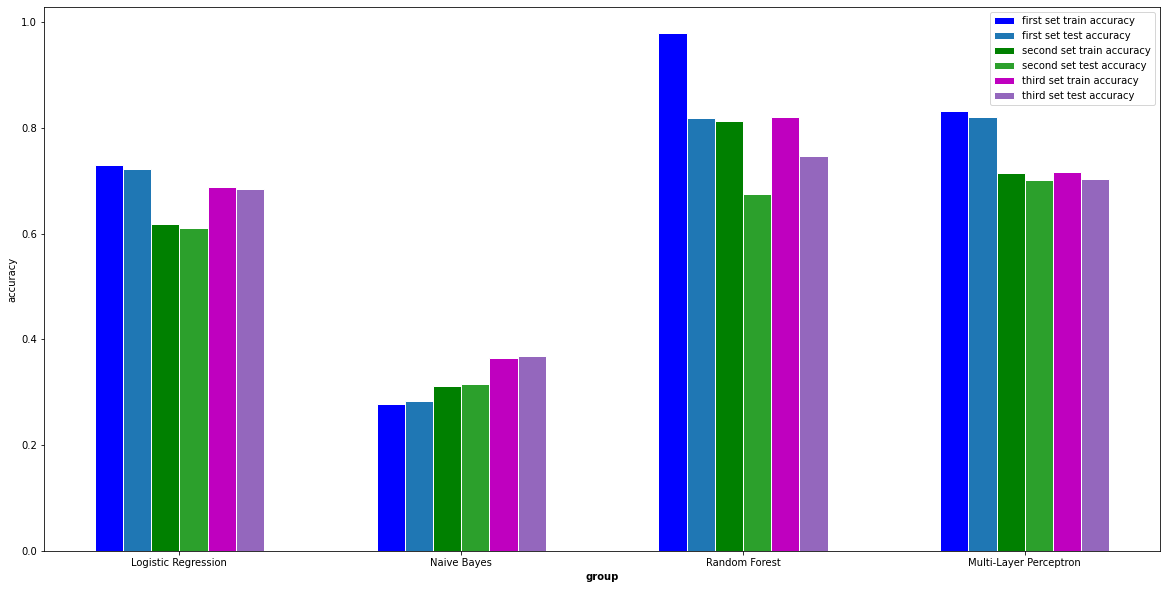

In [183]:
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [first_lgs_train, first_NB_train, first_RF_train, mlp_3k_train]
bars2 = [first_lgs_test, first_NB_test, first_RF_test, mlp_3k_test]
bars3 = [second_lgs_train, second_NB_train, second_RF_train, mlp_second_train]
bars4 = [second_lgs_test, second_NB_test, second_RF_test, mlp_second_test]
bars5 = [third_lgs_train, third_NB_train, third_RF_train, mlp_third_train]
bars6 = [third_lgs_test, third_NB_test, third_RF_test, mlp_third_test]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
 
# Make the plot
plt.figure(figsize=(20,10))
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='first set train accuracy')
plt.bar(r2, bars2, color='tab:blue', width=barWidth, edgecolor='white', label='first set test accuracy')
plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label='second set train accuracy')
plt.bar(r4, bars4, color='tab:green', width=barWidth, edgecolor='white', label='second set test accuracy')
plt.bar(r5, bars5, color='m', width=barWidth, edgecolor='white', label='third set train accuracy')
plt.bar(r6, bars6, color='tab:purple', width=barWidth, edgecolor='white', label='third set test accuracy')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth*2.5 for r in range(len(bars1))], ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Multi-Layer Perceptron'])
plt.ylabel('accuracy')

# Create legend & Show graphic
plt.legend()
plt.show()


From the above plot, we can see that Naive Bayers is definitely not a good learning algorithm for this task. For the rest of the algorithms, multilayer perceptron performs better than logistic regression in general. Training on all the features (first set) can reach a better accuracy than trainig on subsets of the features (second and third set). After tuning the hyperparameters, random forest and multilayer perceptron on first set achieve the best accuracy (around 0.82). The random forest algorithm has overfitting issues. From the plot. we can see its training accuracy is higher than its testing accuracy for all sets. The training accuracy of random forest on first set can reach 0.98. If we can fine-tune the hyperparameters of random forest by using more folds on cross validation or more precise gird search, we could possibly increase the test accuracy. Multipayer perceptron does not have any overfitting issues since its train and test accuracy are similar. If we could have greater computing power to do hyperparameter tuning on neural network to find out the optimal architecture and learning rate, the performance could be better. In general, due to the limits of time and computing power, the hyperparameter tuning processes are not precise enough. 

## Part 4: Sentiment Analysis

### 4.1 Compute Vader on Titles

In [0]:
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
titles = data.title.values

In [194]:
titlesDF = evalSentences(titles, to_df=True, columns = ['title','vader'])

100%|██████████| 44695/44695 [00:06<00:00, 7311.67it/s]


In [196]:
titlesDF.head()

,title,vader
0,Is the winter transfer window officially open?,0.0000
1,When Krispy Kream is life.,0.0000
2,They started playing the wii sports theme at t...,0.2023
3,"No car, no problem",-0.7269
4,Breaking News,0.0000


In [0]:
vader = titlesDF.vader.values

In [0]:
data['vader'] = vader

### 4.2 See vader of each Subreddit

In [0]:
soccer_vader = data.loc[data.subreddit=='soccer'].vader.values
funny_vader = data.loc[data.subreddit=='funny'].vader.values
WTF_vader = data.loc[data.subreddit=='WTF'].vader.values
Android_vader = data.loc[data.subreddit=='Android'].vader.values

In [213]:
len(WTF_vader)

4939

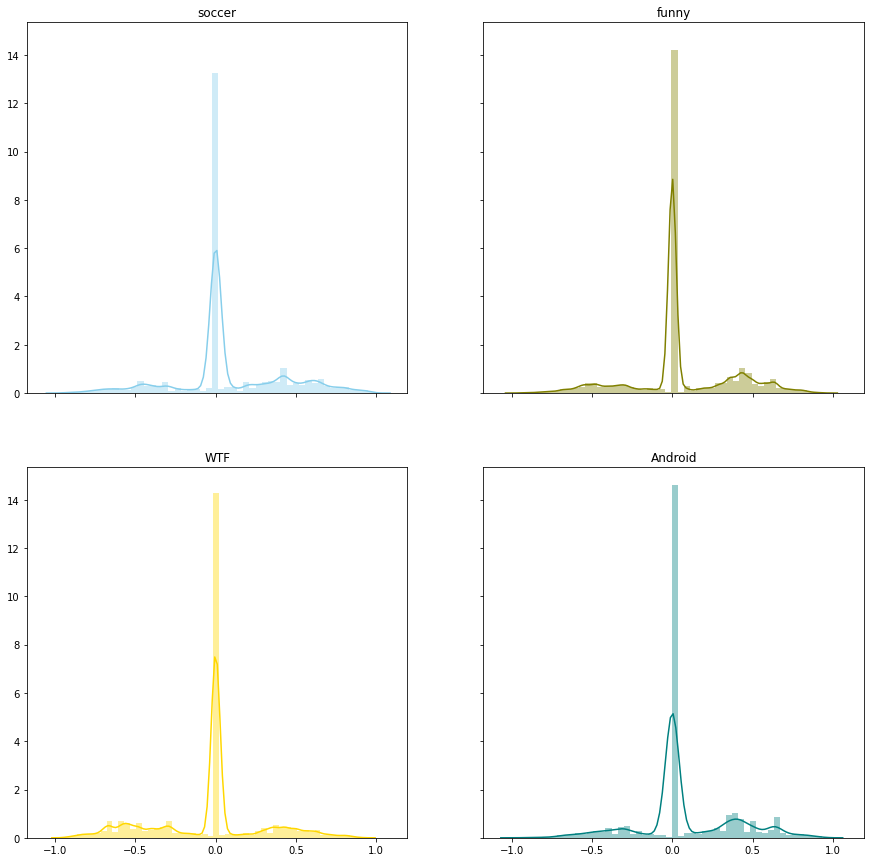

In [219]:
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)
sns.distplot( soccer_vader , color="skyblue", ax=axes[0, 0])
sns.distplot( funny_vader , color="olive", ax=axes[0, 1])
sns.distplot( WTF_vader , color="gold", ax=axes[1, 0])
sns.distplot( Android_vader , color="teal", ax=axes[1, 1])
axes[0,0].title.set_text('soccer')
axes[0,1].title.set_text('funny')
axes[1,0].title.set_text('WTF')
axes[1,1].title.set_text('Android')




For all subreddits, most of the posts have zero vader. For funny and Android and soccer, positive sentiments are slightly more than negative sentiments, and vise versa for WTF. Funny and WTF tend to have more zero vader posts. 

### 4.3 Define Clear Positive and Negative
From the above plot, we choose 0.5 as the threshold. Since most of the posts have zero vader, having |vader| > 0.5 is large enough differentiate the sentiments. Also, choosing 0.5 will remain enough data points. If we choose 0.75, only a few data points would be remained. 

In [0]:
sentiment = []
for v in vader:
  if v > 0.5:
    sentiment.append('positive')
  elif v < -0.5:
    sentiment.append('negative')
  else:
    sentiment.append('neutral')

In [0]:
data['sentiment'] = sentiment

In [0]:
clear = data.loc[data.sentiment!='neutral']

### 4.4 Get TopK 
We find the top words by term frequency. If a term frequently occurs in positive/negative posts, then it means this term are often used to describe the sentiments. 

In [0]:
# clean the title column
def clean(text):
  stop = set(stopwords.words('english'))
  text.replace('$', '')
  text.replace('*', '')
  text = text.lower()
  text = re.sub(r'\S+@\S+','',text)
  test = re.sub(r'\s','',text)
  text = re.sub(r'\swww\S+','',text)
  text = re.sub(r'<.+?>+',' ',text)
  text = re.sub(r'[<][a].+','',text)
  text = re.sub(r'[^a-zA-Z ]','',text)
  text = re.sub(r'\b\w\b',' ',text)
  text = re.sub(r'amp','',text)
  text = (' ').join([word for word in text.split() if word not in stop])
  return text

In [0]:
t = clear.title.values

In [0]:
for i in range (len(t)):
  t[i] = clean(t[i])

In [269]:
clear.head()

,index,id,author,date,subreddit,title,num_comments,score,selftext,url,form,length,vader,sentiment
3,47,abcyee,itsahardg,1,funny,car problem,7,0,,https://v.redd.it/cmdi8cx9ep721,video,4,-0.7269,negative
5,61,abczrm,deathbygamez,1,funny,live brighton recently posted cats hanover fac...,443,31402,,https://i.redd.it/ghitzxhcfp721.jpg,image,41,0.5766,positive
8,68,abd018,SourSquidSalad,1,WTF,sulfur hexafluoride certified wtf,12,16,,https://v.redd.it/29z073bcfp721,video,5,-0.6739,negative
13,101,abd2hv,Gordalini,1,soccer,neymar calls messi ugly instagram confirming t...,2,0,,https://i.redd.it/trmxb1osgp721.png,image,11,-0.5106,negative
15,110,abd34l,[deleted],1,funny,something tells dog doesnt like new vitamin,8,6,[deleted],https://i.redd.it/qtsv1zt5hp721.jpg,image,10,0.5719,positive


In [0]:
def getTopK (df,label,k):
    reviews = df.loc[df.sentiment==label].title.values
    stop = set(stopwords.words('english'))
    counter = Counter()
    tokenizer = tokenize.RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer() 
    # stemer=nltk.stem.porter.PorterStemmer()
    for review in reviews:
        words = [word for word in tokenizer.tokenize(review) if word not in stop and len(word)>2]
        lemmatizer = WordNetLemmatizer() 
        words = [lemmatizer.lemmatize(token,'v') for token in tokenizer.tokenize(review)]
        words = [lemmatizer.lemmatize(token,'n') for token in tokenizer.tokenize(review)]
        counter.update(words)
    topk = counter.most_common(k)
    return topk

In [0]:
topk_pos_soccer = getTopK(clear.loc[clear.subreddit=='soccer'],'positive',10)
topk_neg_soccer = getTopK(clear.loc[clear.subreddit=='soccer'],'negative',10)
topk_pos_funny = getTopK(clear.loc[clear.subreddit=='funny'],'positive',10)
topk_neg_funny = getTopK(clear.loc[clear.subreddit=='funny'],'negative',10)
topk_pos_WTF = getTopK(clear.loc[clear.subreddit=='WTF'],'positive',10)
topk_neg_WTF = getTopK(clear.loc[clear.subreddit=='WTF'],'negative',10)
topk_pos_Android = getTopK(clear.loc[clear.subreddit=='Android'],'positive',10)
topk_neg_Android = getTopK(clear.loc[clear.subreddit=='Android'],'negative',10)

In [0]:
mat = [topk_pos_soccer, topk_pos_funny, topk_pos_WTF, topk_pos_Android, topk_neg_soccer, topk_neg_funny, topk_neg_WTF, topk_neg_Android]

In [0]:
columns = ['soccer positive','funny positive', 'WTF positive', 'Android positive', 'soccer negative','funny negative', 'WTF negative', 'Android negative']

In [0]:
rank = pd.DataFrame(data=map(list, zip(*mat)), columns=columns, index=range(1,11))

In [329]:
rank

,soccer positive,funny positive,WTF positive,Android positive,soccer negative,funny negative,WTF negative,Android negative
1,"(best, 258)","(best, 196)","(friend, 22)","(android, 177)","(player, 79)","(shit, 99)","(wtf, 200)","(android, 40)"
2,"(league, 254)","(love, 152)","(best, 21)","(best, 167)","(football, 66)","(fuck, 62)","(fuck, 47)","(phone, 30)"
3,"(win, 250)","(like, 137)","(like, 19)","(free, 96)","(game, 62)","(hell, 54)","(man, 37)","(google, 28)"
4,"(club, 222)","(friend, 111)","(love, 19)","(app, 81)","(fan, 58)","(bad, 49)","(dead, 32)","(problem, 15)"
5,"(player, 218)","(great, 86)","(look, 13)","(phone, 73)","(chelsea, 51)","(one, 36)","(shit, 25)","(app, 15)"
6,"(united, 181)","(good, 75)","(free, 12)","(apps, 59)","(penalty, 46)","(hate, 35)","(dog, 22)","(huawei, 13)"
7,"(goal, 163)","(ever, 69)","(great, 11)","(google, 47)","(club, 45)","(as, 33)","(kill, 20)","(kill, 11)"
8,"(team, 157)","(happy, 61)","(year, 11)","(help, 43)","(police, 35)","(wtf, 33)","(nsfw, 20)","(user, 10)"
9,"(year, 152)","(im, 54)","(happy, 11)","(please, 39)","(year, 34)","(im, 30)","(back, 19)","(pixel, 9)"
10,"(cup, 143)","(fun, 52)","(fun, 10)","(play, 34)","(injury, 34)","(worst, 27)","(death, 18)","(bad, 9)"


For positive posts, "best" ranked top 1 in soccer and funny and top 2 in WTF and Android. The term "best" is universally used for describing positive sentiments. Funny and WTF subreddits have a lot of top words in common, such as "like", "love" and "happy". These two subreddits are not related to specific topics. In contrast, soccer and Android have top words related to their topic specificly, such as "league", "app" and etc. The negative posts also have the same logic. Funny and WTF share similar top words such as "shit", "wtf", "fuck" and etc. Whereas soccer and Android also have their specific top words related to their domain like "penalty", "injury", "huawei" and etc. 